# HSE Введение в машинное обучение

## Лекция 2

### Polina Polunina
polina.polunina@skolkovotech.ru

# 1. Linear Regression and Classification Tutorial


Import packages:

In [2]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

## Learn ML in 3 minutes:

#### Linear regression

In [4]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv('train.csv', index_col = 0, usecols=['Id', 'GrLivArea', 'SalePrice'])
X = data.drop('SalePrice', axis=1)
X = sm.add_constant(X)
Y = data.SalePrice
reg = LinearRegression()
model=reg.fit(X,Y)
predictions=model.predict(X)
model.score(X,Y)

0.5021486502718042

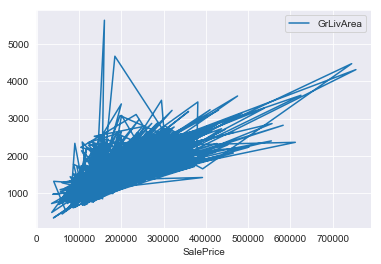

In [5]:
data.plot('SalePrice')

#### Random forest

In [3]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
reg = sklearn.ensemble.RandomForestRegressor()
model=reg.fit(X,Y)
predictions=model.predict(X)
model.score(X,Y)

0.8129447887054793

#### Decision Trees

In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
model=reg.fit(X,Y)
predictions=model.predict(X)
model.score(X,Y)

0.8835703492273516

#### Support vector machines

In [5]:
from sklearn.svm import SVR
reg = SVR(kernel='linear')
model=reg.fit(X,Y)
predictions=model.predict(X)
model.score(X,Y)

0.4989427223917196

#### MLP a.k.a. simple neural network


In [6]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
model=reg.fit(X,Y)
predictions=model.predict(X)
model.score(X,Y)

0.49626399651847974

## 1.1 Simple Linear Regression
Simple Linear Regression - regression with one variable

Load the dataset:
* **SalePrice** - The property's sale price in dollars. This is the target variable that you're trying to predict
* **GrLivArea** - Above grade (ground) living area square feet


In [6]:
data = pd.read_csv('train.csv', index_col = 0, usecols=['Id', 'GrLivArea', 'SalePrice'])

Let's have a look into the data:

In [7]:
data.head()

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


In [9]:
data.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


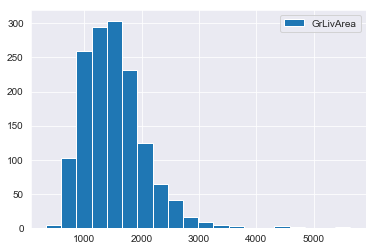

In [10]:
data.GrLivArea.hist(bins=20, label='GrLivArea')
plt.legend()
plt.show()

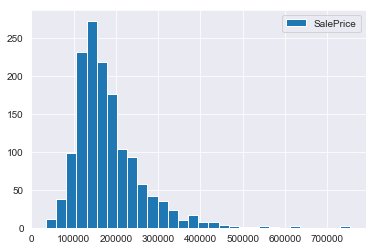

In [11]:
data.SalePrice.hist(bins=30, label='SalePrice')
plt.legend()
plt.show()

In [12]:
data.SalePrice.quantile(0.95)

326099.99999999994

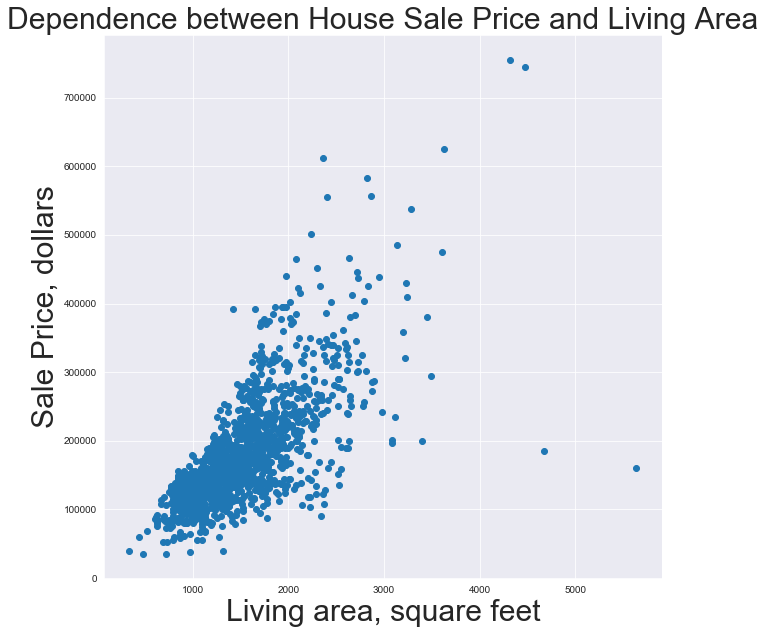

In [19]:
#set figsize of the plot
plt.figure(figsize = (10,10))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice)
#text for x axis
plt.xlabel('Living area, square feet', fontsize = 30)
#text for y axis
plt.ylabel('Sale Price, dollars', fontsize = 30)
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area', fontsize = 30)
#show the plot
plt.show()

### How to model this dependence?

### Building a model

* Y = SalePrice - target, dependent variable 
* X = GrLivArea - predictor, independent variable

**the model**

We want to find a line that reflects the dependence between Sale Price and Living area


$Y = a + bX + \epsilon$


In [32]:
X = data.GrLivArea
X = X**2
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [33]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      0.425     
Dependent Variable:  SalePrice         AIC:                 36282.9533
Date:                2019-04-08 21:13  BIC:                 36293.5257
No. Observations:    1460              Log-Likelihood:      -18139.   
Df Model:            1                 F-statistic:         1080.     
Df Residuals:        1458              Prob (F-statistic):  1.13e-177 
R-squared:           0.425             Scale:               3.6285e+09
----------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------
const     116340.9959 2519.5683 46.1750 0.0000 111398.6298 121283.3619
GrLivArea      0.0251    0.0008 32.8580 0.0000      0.0236      0.0266
----------------------------------------------------------------------
Omnibus:               491.750       Durbin-Watson:          1.621    
Prob(Omnibus):         0.000         Jarque-Bera (JB):       29281.606
Skew:                  -0.727        Prob(JB):               0.000    
Kurtosis:              24.891        Condition No.:          5270749  
======================================================================
* The condition number is large (5e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

### What do all these stats mean?

* **const** - the found value for a
* **GrLivArea** - the found value for b

so that our model is **Y = 18569.0259 + 107.1304 * X**

**Hypothesis testing and *p-value***

$H_0$: coeff = 0 - null hypothesis

$H_1$: coeff $\neq$ 0 - alternative hypothesis

* If *p-value* $\leq$ alpha, then we **CAN** reject the null hypothesis and the coeff is called **significant**
* If *p-value* > alpha, then we **CAN NOT** reject the null hypothesis and the coeff is called **insignificant**
    
    
**How to choose a suitable alpha value?**

Alphas could be: 0.01, 0.05, 0.1 ... 

**Recall from stats course: 1-type and 2-type errors:**

<img style="float: left;" src="pic1.jpg" br>


<img style="float: left;" src="pic2.jpg" br>


What is the appropriate false positives and false negatives level?

The most common alpha for coeffs = 0.05

#### How well this relation reflects the dependence?
**Y = 18569.0259 + 107.1304 * X**

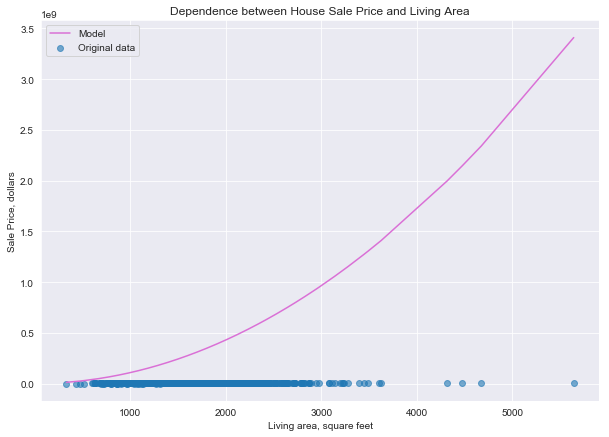

In [35]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
data = data.sort_values(by=['GrLivArea'])
plt.scatter(data.GrLivArea, data.SalePrice, alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(data.GrLivArea.values, 18.0259 + 107.1304 * (data.GrLivArea.values*data.GrLivArea.values), color = 'orchid', label='Model')
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
plt.legend()
#show the plot
plt.show()

#### $R^2$ and Regression Performance

Another recall from you statistics course =)

$R^2$ is the **coefficient of determination**, the most common performance metric for regression problems

In case of linear regression, $R^2$ is defined in the following way:

* $y_i$ - observed target data
* $\hat{y_i}$ - predicted data
* $\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ - mean of the observed data
* $SS_{tot} = \sum_{i}(y_i - \overline{y})^2$ - total sum of squares
* $SS_{reg} = \sum_{i}(\hat{y_i} - \overline{y})^2$ - explained sum of squares
* $SS_{res} = \sum_{i}(y_i - \hat{y_i})^2 = \sum_{i}residual_i^2$ - residual sum of squares

$R^2 = \frac{SS_{reg}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}$ - the ratio of the explained variance 

$R^2$ range is [0, 1]

In our model, $R^2 = 0.502$, so only a half of the variance is explained

**Note:** $R^2$ is biased (!) and we should look into $R^2_{adjusted}$

### Can we do better?

Let's take logarithms from X and Y, so that our model is **$ln(Y) = a + b*ln(X) + \epsilon$**

In [36]:
X = data.GrLivArea
Y = data.SalePrice
X=np.log(X)
#Y=np.log(Y)
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [37]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.483     
Dependent Variable:     SalePrice           AIC:                   36128.3292
Date:                   2019-04-08 21:26    BIC:                   36138.9016
No. Observations:       1460                Log-Likelihood:        -18062.   
Df Model:               1                   F-statistic:           1363.     
Df Residuals:           1458                Prob (F-statistic):    3.14e-211 
R-squared:              0.483               Scale:                 3.2639e+09
-----------------------------------------------------------------------------
              Coef.      Std.Err.     t     P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------
const     -1022316.5161 32623.9468 -31.3364 0.0000 -1086311.4016 -958321.6306
GrLivArea   165557.9340  4484.1329  36.9208 0.0000   156761.8930  174353.9751
-----------------------------------------------------------------------------
Omnibus:                 436.051          Durbin-Watson:             1.764   
Prob(Omnibus):           0.000            Jarque-Bera (JB):          2702.302
Skew:                    1.242            Prob(JB):                  0.000   
Kurtosis:                9.184            Condition No.:             162     
=============================================================================

"""

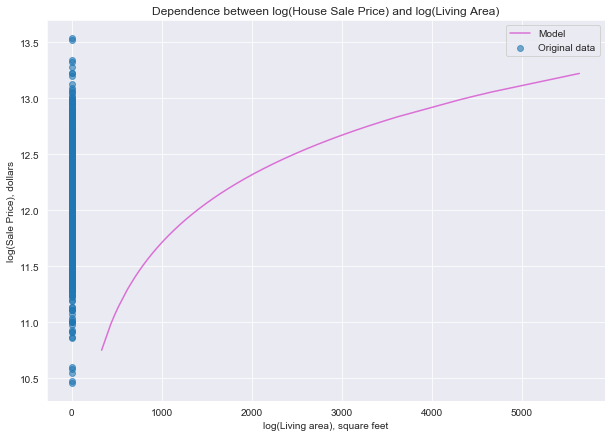

In [39]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(np.log(data.GrLivArea), np.log(data.SalePrice), alpha=0.6, label = 'Original data')
#plot of the found regression line
#plt.plot(np.log(data.GrLivArea.values), 5.6681 + 0.8745 * np.log(data.GrLivArea.values), color = 'orchid', label='Model')
plt.plot(data.GrLivArea.values, 5.6681 + 0.8745 * np.log(data.GrLivArea.values), color = 'orchid', label='Model')
#text for x axis
plt.xlabel('log(Living area), square feet')
#text for y axis
plt.ylabel('log(Sale Price), dollars')
#text for the plot title
plt.title('Dependence between log(House Sale Price) and log(Living Area)')
plt.legend()
#show the plot
plt.show()

## 1.2 Multiple Linear Regression

In [3]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [4]:
data = pd.read_csv('train.csv', index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Check for Nan values:

In [42]:
data.isna().sum().sum()

0

### Define the model

In [82]:
X = data.drop('SalePrice', axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

Calculate some statistical parameters:

In [83]:
#together with the intercept
k = X.shape[1]
#total number of observations
n = X.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of paraters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of paraters to estimate: 31 
 total number of observations: 1460 
 degrees of freedom of the model: 30 
 degrees of freedom of the errors: 1429


Calculate the rank of feature matrix:

In [84]:
np.linalg.matrix_rank(X)

30

In [85]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34737.9309
Date:                    2019-04-10 21:22     BIC:                    34896.5166
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                29                   F-statistic:            207.6     
Df Residuals:            1430                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2357e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         608246.1995 1428003.7488  0.4259 0.6702 -2192960.6498 3409453.0488
MSSubClass      -161.5055      26.4469 -6.1068 0.0000     -213.3845    -109.6266
LotArea            0.3868       0.1016  3.8079 0.0001        0.1875       0.5860
OverallQual    18012.7658    1194.9364 15.0742 0.0000    15668.7495   20356.7821
OverallCond     4425.5378    1031.1020  4.2920 0.0000     2402.9031    6448.1725
YearBuilt        349.4880      61.2239  5.7084 0.0000      229.3896     469.5863
YearRemodAdd     140.9941      66.3557  2.1248 0.0338       10.8292     271.1590
BsmtUnfSF         -9.7412       3.1432 -3.0991 0.0020      -15.9070      -3.5754
TotalBsmtSF       20.5078       4.5849  4.4729 0.0000       11.5140      29.5016
1stFlrSF          18.9417       6.1645  3.0727 0.0022        6.8492      31.0341
2ndFlrSF          19.5079       5.7011  3.4218 0.0006        8.3244      30.6914
LowQualFinSF      -6.7807      14.8869 -0.4555 0.6488      -35.9831      22.4218
GrLivArea         31.6689       5.7075  5.5486 0.0000       20.4729      42.8650
BsmtFullBath    8400.0052    2512.7996  3.3429 0.0009     3470.8365   13329.1738
FullBath        3414.1786    2838.1391  1.2030 0.2292    -2153.1840    8981.5413
HalfBath       -1549.1048    2690.0026 -0.5759 0.5648    -6825.8793    3727.6697
BedroomAbvGr  -10546.9569    1704.6005 -6.1873 0.0000   -13890.7426   -7203.1712
KitchenAbvGr  -12589.7919    5254.5163 -2.3960 0.0167   -22897.1787   -2282.4051
TotRmsAbvGrd    5095.3485    1250.1490  4.0758 0.0000     2643.0258    7547.6713
Fireplaces      3707.1220    1784.0235  2.0780 0.0379      207.5382    7206.7058
GarageCars     10562.3784    2884.3767  3.6619 0.0003     4904.3150   16220.4418
GarageArea         2.1462       9.7916  0.2192 0.8265      -17.0613      21.3537
WoodDeckSF        25.7208       8.0357  3.2008 0.0014        9.9578      41.4838
OpenPorchSF       -6.2873      15.3029 -0.4109 0.6812      -36.3058      23.7312
EnclosedPorch      6.6916      17.0190  0.3932 0.6942      -26.6932      40.0765
3SsnPorch         21.6727      31.6870  0.6840 0.4941      -40.4854      83.8308
ScreenPorch       55.1441      17.3306  3.1819 0.0015       21.1479      89.1403
PoolArea         -42.4124      23.8035 -1.7818 0.0750      -89.1059       4.2810
MiscVal           -0.8946       1.8753 -0.4770 0.6334       -4.5731       2.7840
MoSold          -111.5227     348.4163 -0.3201 0.7490     -794.9846     571.9391
YrSold          -817.2240     709.7266 -1.1515 0.2497    -2209.4410     574.9931
--------------------------------------------------------------------------------
Omnibus:               540.774        Durbin-Watson:           1.961            
Prob(Omnibus):         0.000          Jarque-Bera (JB):        95836.983        
Skew:                  -0.553         Prob(JB):                0.000            
Kurtosis:              42.676         Condition No.:           13129423541445024
================================================================================
* The c

In [89]:
results.pvalues

const            6.702145e-01
MSSubClass       1.307639e-09
LotArea          1.460636e-04
OverallQual      9.115796e-48
OverallCond      1.889426e-05
YearBuilt        1.384933e-08
YearRemodAdd     3.377249e-02
BsmtUnfSF        1.978740e-03
TotalBsmtSF      8.325674e-06
1stFlrSF         2.161471e-03
2ndFlrSF         6.397309e-04
LowQualFinSF     6.488334e-01
GrLivArea        3.426349e-08
BsmtFullBath     8.505406e-04
FullBath         2.291895e-01
HalfBath         5.647904e-01
BedroomAbvGr     7.973465e-10
KitchenAbvGr     1.670320e-02
TotRmsAbvGrd     4.837962e-05
Fireplaces       3.789146e-02
GarageCars       2.594490e-04
GarageArea       8.265357e-01
WoodDeckSF       1.400508e-03
OpenPorchSF      6.812393e-01
EnclosedPorch    6.942408e-01
3SsnPorch        4.941106e-01
ScreenPorch      1.494666e-03
PoolArea         7.499800e-02
MiscVal          6.334092e-01
MoSold           7.489509e-01
YrSold           2.497343e-01
dtype: float64

**Resuls explanation:**

* $R^2 = 0.808$
* $R^2_{adj} = 0.804$
* Log-Likelihood = -1733 - A value of Likelihood function in the optimal point
* AIC = 34738 - Akaike information criterion, is used for model selection purposes. Preferred model is the one with the minimum AIC value
* BIC = 34897 - Bayesian information criterion, the same purposes as for AIC
* F-statistic = 208

**F- Test for the overall model significance**:

$H_{0}$ : The fit of intercept only model and the current model is same. i.e. Additional variables do not provide value taken together

$H_{1}$ : The fit of intercept only model is significantly less compared to our current model. i.e. Additional variables do make the model significantly better.

$F = \frac{R^2/(k-1)}{(1-R^2)/(n-k)}$,

where $k$ - the number of variables (with intercept term), $n$ - the number of observations


If the calculated F-value is greater than the F value from the statistical table, than we can reject the $H_{0}$ hypothesis

* Prob(F-statistic) = 0.0 - P-value for F-test
* Df model - degrees of freedom of the model
* Df Residuals - degrees of freedom of the errors

**Note:** don't be confused with the values of Df (!). THe true values is calculated above. In this specific realization of OLS, DF model is calculated as a rank of the X matrix, which equals to 29

* Scale - squared standard error of the regression

* Durbin-Watson = 1.96; DW is a test for autocorrelation of the errors. DW value always lies between 0 and 4. If , DW << 2 there is a positive serial correlation, if DW >> 2 - there is a negative correlation


**Note:** not all the variables are significant. What should we do next? There is a number of methods (a.k.a. Feature engineering):

* **Elimination by P-value:**

Build a model using a full set of features. Then, eliminate the insignificant features sequentially starting from the one with the highest P-value

* **Forward elimination:**

Build all possible regression models with a single predictor and pick the best one. Then try all possible models that include that best predictor plus a second predictor. Pick the best of those. You keep adding one feature at a time, and you stop when your model no longer improves or starts worsening. 

* **Backward elimination:**

Build a regression model that includes a full set of predictors. Next, gradually remove one at a time according to the predictor whose removal makes the biggest improvement. You stop removing predictors when the removal makes the predictive model worsen.

### Task 1: 

* Find collinear variables and leave only one of them 

In [47]:
corr = data.corr()
corr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.140759,-0.238518,-0.251758,0.307886,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,-0.002618,0.260833,0.299475,0.050986,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.308159,0.537808,0.476224,0.295493,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.136841,-0.171098,-0.144203,0.028942,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.149040,0.391452,0.281986,0.010308,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.181133,0.291066,0.240379,0.140024,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,1.000000,0.415360,0.317987,0.004469,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.415360,1.000000,0.819530,-0.174512,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,0.317987,0.819530,1.000000,-0.202646,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
2ndFlrSF,0.307886,0.050986,0.295493,0.028942,0.010308,0.140024,0.004469,-0.174512,-0.202646,1.000000,...,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,-0.028700,0.319334


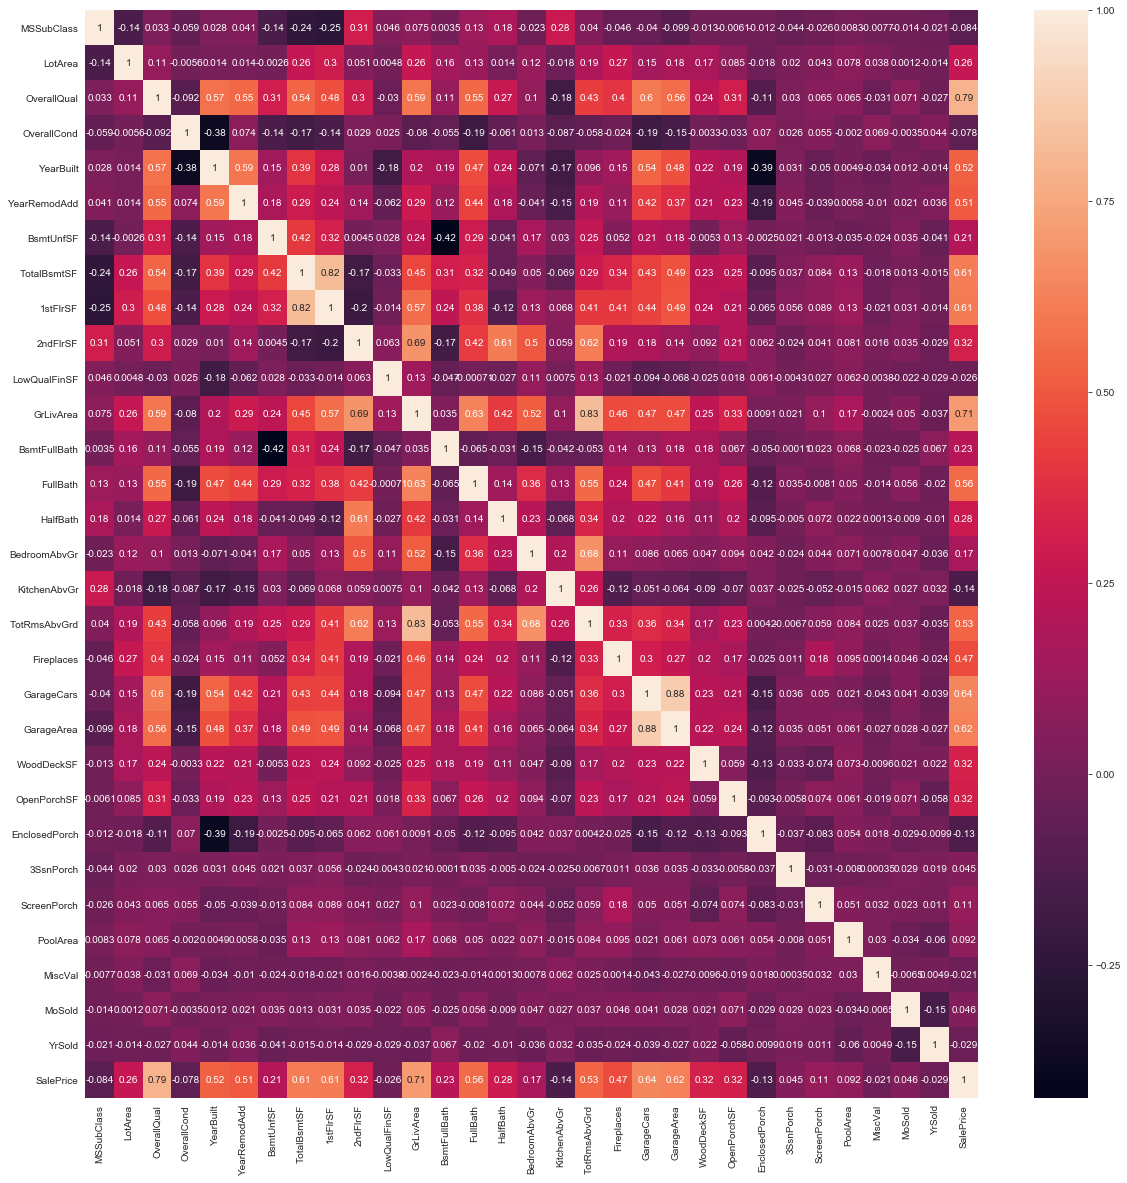

In [13]:
ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [52]:
corr.iloc[30,29]

-0.028922585168730426

In [61]:
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i,j] >=0.7: print(data.columns[i],'sp>',corr.iloc[i,30],';',' --> ',data.columns[j],'sp>',corr.iloc[j,30],';')
        #corr = corr.drop(corr.columns[i-1], axis = 1)

OverallQual sp> 0.7909816005838047 ;  -->  SalePrice sp> 1.0 ;
TotalBsmtSF sp> 0.6135805515591944 ;  -->  1stFlrSF sp> 0.6058521846919166 ;
GrLivArea sp> 0.7086244776126511 ;  -->  TotRmsAbvGrd sp> 0.5337231555820238 ;
GrLivArea sp> 0.7086244776126511 ;  -->  SalePrice sp> 1.0 ;
GarageCars sp> 0.640409197258349 ;  -->  GarageArea sp> 0.6234314389183598 ;


In [ ]:
TotalBsmtSF 
GrLivArea 
GarageCars

### Task 2: Implement feature elimination by P-value

**Hints**:
    * use cycles
    * look to the score values (Note: R^2 is biased) and P-values of the corresponding coefficients
    * constant term should be included 
    
**Note:** The insignificant variable in a model could become significant in another model and vice versa

**Note 2:** Two estimated models with different features are two distinct models (!)

In [75]:
x = data.drop('SalePrice', axis=1)
Y = data['SalePrice']

In [111]:
res = sm.OLS(Y, x).fit()
p_max = max(res.pvalues)

5.204068873771547e-57


In [116]:
for i in range(x.shape[1]):
    res = sm.OLS(Y, x).fit()
    p_max = max(res.pvalues)
    if p_max > 0.05:
        for j in range(x.shape[1] - i):
            if (res.pvalues[j] == p_max):
                x = x.drop(x.columns[j], axis=1)
                    
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     3506.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:38:21   Log-Likelihood:                -18149.
No. Observations:                1460   AIC:                         3.631e+04
Df Residuals:                    1456   BIC:                         3.633e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF    102.2987      3.727     27.448      0.000      94.988     109.610
KitchenAbvGr  -2.89e+04   7248.570     -3.987      0.000   -4.31e+04   -1.47e+04
WoodDeckSF     117.9605     13.068      9.027      0.000      92.327     143.594
YrSold          45.7600      4.435     10.317      0.000      37.060      54.460
==============================================================================
Omnibus:                      408.105   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5833.979
Skew:                           0.895   Prob(JB):                         0.00
Kurtosis:                      12.628   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. Logistic Regression

Load the dataset:

In [117]:
X, Y = sklearn.datasets.load_iris(return_X_y=True)
names = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']
#create pandas object
X = pd.DataFrame(X, columns=names)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target variable is already encoded:
    * 0 - Setosa
    * 1 - Versicolor
    * 2 - Verginica
    
<img style="float: left;" src="iris.jpg" br>


Data statistics:

In [37]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


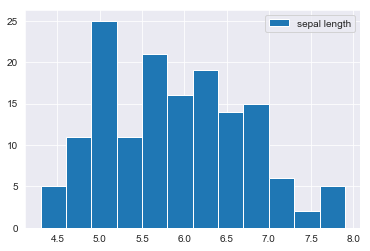

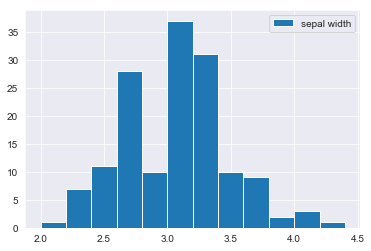

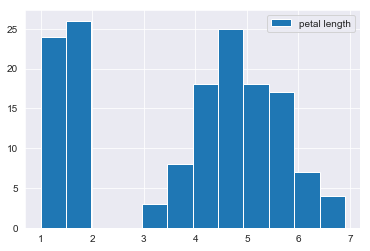

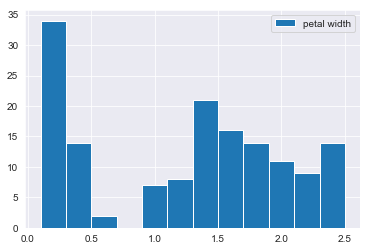

In [52]:
for name in names:
    X[name].hist(bins=12, label=name)
    plt.legend()
    plt.show()

Correlation:

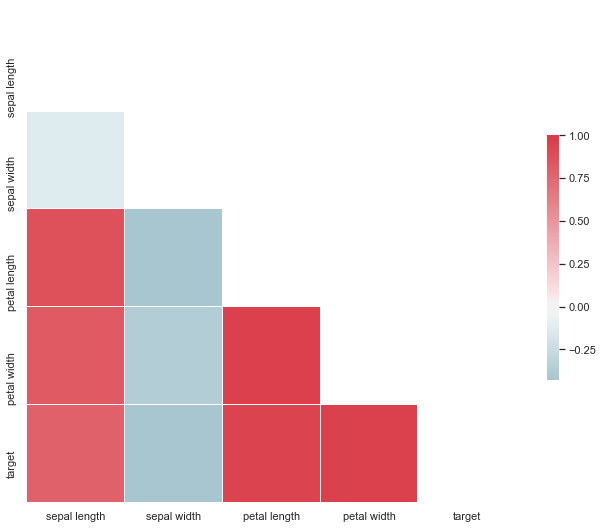

In [118]:
dt=pd.concat([X,pd.DataFrame(Y, columns=['target'])], axis=1)
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Another nice plots:

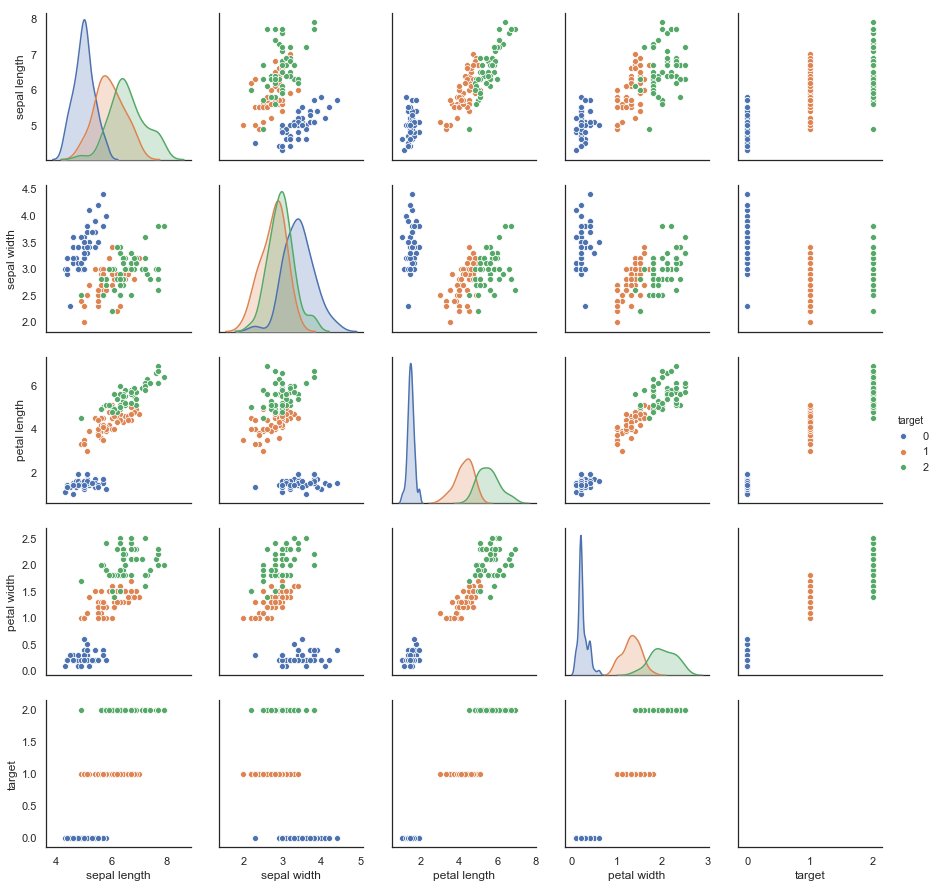

In [40]:
sns.pairplot(dt, kind='scatter', hue='target')
plt.show()

[]

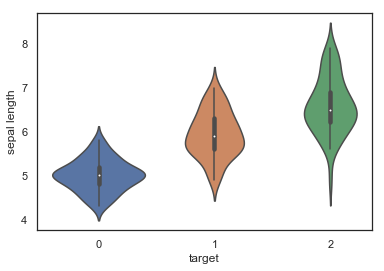

In [41]:
sns.violinplot( x=dt["target"], y=dt["sepal length"])
plt.plot()

Rank of the features matrix:

In [42]:
np.linalg.matrix_rank(X)

4

In [43]:
#from sklearn import metrics 
logit = sm.MNLogit(Y, X)
result = logit.fit()
preds=np.argmax(result.predict(X).values,axis=1)
accuracy_score(Y,preds)

         Current function value: 0.072266
         Iterations: 35


0.9666666666666667

**Logistic regression with L1 regularization**

In [44]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga').fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.98

**Logistic regression with L2 regularization**

In [45]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.9866666666666667

In [46]:
solvers=['newton-cg', 'sag', 'saga', 'lbfgs']
for solver in solvers:
    model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver=solver, fit_intercept=True).fit(X,Y)
    preds=model.predict(X)
    print(solver, accuracy_score(Y, preds))

newton-cg 0.9733333333333334
sag 0.9866666666666667
saga 0.9866666666666667
lbfgs 0.9733333333333334


### Analysing the results

### Task 3: 
* make scatter plots of any two variables from X
    * a) use true target labels as colors
    * b) use predicted labels as colors
    
**Hint:** use sns.lmplot  

* find at least 2 datapoints that was incorrectly classified

In [121]:
x.columns

Index(['TotalBsmtSF', 'KitchenAbvGr', 'WoodDeckSF', 'YrSold'], dtype='object')

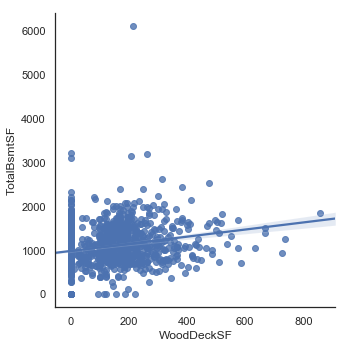

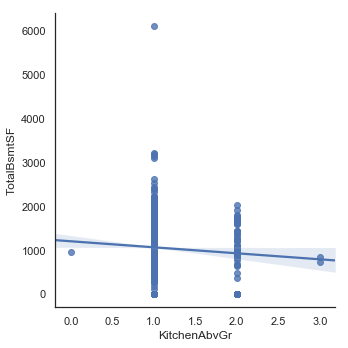

In [128]:
sns.lmplot(x="WoodDeckSF", y="TotalBsmtSF", data=x)
sns.lmplot(x="KitchenAbvGr", y="TotalBsmtSF", data=x)

### Task 4:
* read about confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
* calculate and plot confusion matrix (https://scikit-learn.org/0.20/auto_examples/model_selection/plot_confusion_matrix.html)

### Task 5: Estimate (any) logistic regression model for two classes: versicolor and virginica
    * 0) plot the dependence between two variables and color them by the target labels    
    * a) form new dataset i.e. remove features setosa from the data
    * b) estimate the model
    * c) print accuracy score